#Importing Dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

##Training Image preprocessing


In [19]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_vegetable_Recognoition/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing


In [20]:
validation_set = training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_vegetable_Recognoition/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


##Building Model


In [21]:
cnn = tf.keras.models.Sequential()

##Builiding Convolution Layer

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters= 32,kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters= 64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters= 64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [24]:
cnn.add(tf.keras.layers.Flatten())

In [25]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [26]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [27]:
cnn.add(tf.keras.layers.Dropout(0.5)) ##We are dropping some neurons to avoid over fitting

In [28]:
#Ooutput Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [15]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
cnn.build(input_shape=(None,64,64,3)) #Replace with your actual input shape

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                   

In [17]:
training_histiory = cnn.fit(x=training_set,validation_data=validation_set,epochs=33)

Epoch 1/33
11/11 [==============================] - 76s 3s/step - loss: 19.8692 - accuracy: 0.0199 - val_loss: 3.5524 - val_accuracy: 0.0570
Epoch 2/33
11/11 [==============================] - 33s 2s/step - loss: 3.5743 - accuracy: 0.0370 - val_loss: 3.5228 - val_accuracy: 0.0912
Epoch 3/33
11/11 [==============================] - 39s 3s/step - loss: 3.5108 - accuracy: 0.0627 - val_loss: 3.3356 - val_accuracy: 0.2194
Epoch 4/33
11/11 [==============================] - 39s 3s/step - loss: 3.3057 - accuracy: 0.1168 - val_loss: 3.0911 - val_accuracy: 0.4217
Epoch 5/33
11/11 [==============================] - 30s 2s/step - loss: 3.0889 - accuracy: 0.2365 - val_loss: 2.6877 - val_accuracy: 0.3134
Epoch 6/33
11/11 [==============================] - 30s 2s/step - loss: 2.7940 - accuracy: 0.2792 - val_loss: 1.9044 - val_accuracy: 0.5954
Epoch 7/33
11/11 [==============================] - 30s 2s/step - loss: 2.1632 - accuracy: 0.4444 - val_loss: 1.4292 - val_accuracy: 0.6496
Epoch 8/33
11/11 [=

##Saving Model


In [ ]:
cnn.save('trained_model.h5')

In [ ]:
#training_histiory.history #Return Dictionary of history

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_histiory.history,f)

In [ ]:
print(training_histiory.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %" .format(training_histiory.history['val_accuracy'][-1]*100))

Validation set Accuracy: 90.88318943977356 %


#Accuracy Visualization


#Training Visualization

In [ ]:
training_histiory.history['accuracy']

[0.028490029275417328,
 0.07122506946325302,
 0.23646724224090576,
 0.404558390378952,
 0.6353276371955872,
 0.7863247990608215,
 0.9031339287757874,
 0.9116809368133545,
 0.934472918510437,
 0.9487179517745972,
 0.9430199265480042,
 0.9430199265480042,
 0.9316239356994629,
 0.9544159770011902,
 0.945868968963623,
 0.9772079586982727,
 0.9715099930763245,
 0.9686609506607056,
 0.9658119678497314,
 0.9857549667358398,
 0.9715099930763245,
 0.9886040091514587,
 0.994301974773407,
 0.9857549667358398,
 0.9857549667358398,
 0.9886040091514587,
 0.9829059839248657,
 0.9914529919624329,
 0.9829059839248657,
 0.9886040091514587,
 0.9829059839248657,
 0.9886040091514587]

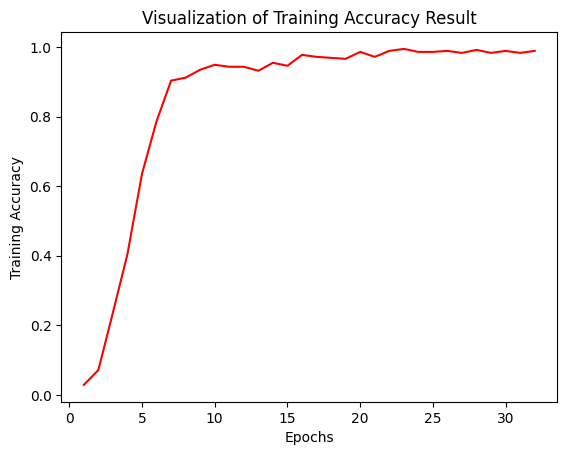

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_histiory.history['accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

#Validation Accuracy

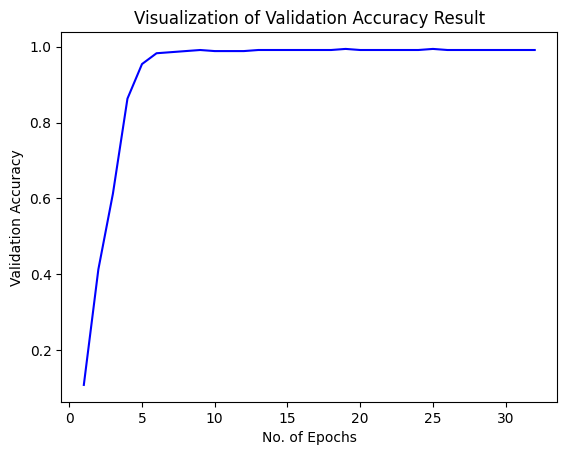

In [ ]:
plt.plot(epochs,training_histiory.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Evaluating CNN Model

In [ ]:
training_loss,training_accuracy = cnn.evaluate(training_set)

11/11 [==============================] - 13s 389ms/step - loss: 0.0217 - accuracy: 0.9915


In [ ]:
val_loss,val_accuuracy = cnn.evaluate(validation_set)

11/11 [==============================] - 13s 490ms/step - loss: 0.0217 - accuracy: 0.9915


#Test set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_vegetable_Recognoition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_accuracy = cnn.evaluate(test_set)

12/12 [==============================] - 68s 1s/step - loss: 0.7237 - accuracy: 0.8886
